In [1]:
import numpy as np
import time 

# <font color='orange'>H.W # 2: 두 희소 행렬의 곱셈을 수행하는 함수를 작성하시오. </font>

$$ C_{ij} = \sum_k A_{ik} \cdot B_{kj} $$

1. 두 행렬의 곱셈은 A는 r by c, B는 c by l 과 같이 A의 열의 수와 B의 행수가 같아야 한다.         아니면 null을 리턴한다. 곱셈 결과 C 행렬은 r by l이 된다.
2. 희소행렬 곱셈 결과를 저장할 빈 리스트를 생성한다. 
3.  위의 식 $ C_{ij} $ 를 계산해서 그 값이 0 이 아니면 C 희소행렬에 (i,j, 계산값)을 추가한다.   
4. C 희소행렬에  add 한 개수와 결과 dimension을 계산한 후, 헤더를 업데이트 한다.
5. C 희소행렬을 반환한다.


In [2]:
import numpy as np

class SparseMatrix:
    def __init__(self, m, n):
        self.s = [[m,n,0]] # m by n 행렬을 만듦 (해더 역할)
        self.m = m
        self.n = n
    
    def append(self, i, j, value):
        if value != 0:
            self.s.append([i, j, value])
        self.s[0][2] = len(self.s) - 1 # s[0][2]는 elements 개수이므로 해더의 개수를 빼준다
    
    def shape(self):
        return (self.m, self.n)
    
    def getValue(self, i, j):
        for k in range(1, len(self.s)):
            if self.s[k][0] == i and self.s[k][1] == j:
                return self.s[k][2]
        return 0 # i, j 가 없는 것은 0 -- 희소행렬은 값이 있는 행렬만 저장
    
    def print(self):
        _temp = np.zeros((self.m, self.n)) # 모든 elements가 0인 행렬을 만든다
        for i in range(1, len(self.s)):# 0번째는 해더이므로 제외하고
            _temp[self.s[i][0]-1, self.s[i][1]-1] = self.s[i][2] # np.zeros가 0행부터 시작하므로 1을 빼줌
        print(_temp)
        
    def transpose(self):
        transpose = SparseMatrix(self.m, self.m)
        for i in range(len(self.s)):
            if i == 0 : # elements의 개수는 transpose하기 전과 후는 같으므로!
                transpose.s[0][2] = self.s[0][2]
            else:
                transpose.append(self.s[i][1], self.s[i][0], self.s[i][2])
        return transpose.print()


a = SparseMatrix(3,3)
b = SparseMatrix(3,3)
   
a.append(1,1,1)
a.append(2,2,2)
a.append(3,3,3)
b.append(1,1,4)
b.append(1,2,7)
b.append(2,3,2)
b.append(3,3,1)

a.print()
b.print()

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[4. 7. 0.]
 [0. 0. 2.]
 [0. 0. 1.]]


In [3]:
def mutmul(a,b):
    if a.shape()[1] != b.shape()[0]:
        print("행렬 차원이 맞지 않아 곱할 수 없습니다.")
    else:
        c = SparseMatrix(a.shape()[0], b.shape()[1])
        for i in range(1, len(a.s)):
            for j in range(1, len(a.s)):
                _temp = 0
                for k in range(1, len(a.s)):
                    _temp += a.getValue(i,k) * b.getValue(k,j)
                c.append(i,j,_temp)
                
    return c
c = mutmul(a,b)
c.print()

[[4. 7. 0.]
 [0. 0. 4.]
 [0. 0. 3.]]


# <font color='orange'>H.W # 4: 이미지 파일을 선택해서 보여주는 프로그램을 수정하여 이미지 폴더를 선택하면 그 안의 모든 파일을 순환적으로 보여주는 프로그램으로 바꾸세요.</font>
밑에있는 CircleLinkedList를 CL_List.py로 만들어야지 import할 수 있음!

In [6]:
class Node:
    def __init__(self, item=None):
        self.item = item
        self.link = None


class CircleLinkedList:
    def __init__(self):
        self.root = Node()
        self.tail = self.root # 리스트 마지막 노드 tail.link = root가 된다
        self.current = self.root # 리스트 순환을 위해서 현재 노드를 관리

    def append(self, item):
        # 추가할 새노드를 만든다.
        newNode = Node(item)
        # 루트가 비어 있으면 루트와 테일을 새노드로 지정한다.
        if self.root.item == None:
            self.root = newNode
            self.tail = newNode
            newNode.link = self.root
            self.current = self.root
        else:
            # 루트가 비어 있지 않으면 테일 뒤에 새노드를 추가하고 테일을 업데이트한다.
            _tmp = self.tail.link
            self.tail.link = newNode
            newNode.link = _tmp # _tmp는 root
            self.tail = newNode #
            #newNode = self.tail

    # 리스트 안에 모든 노드를 프린트 한다.
    def print(self):
        curNode = self.root
        print(curNode.item)
        while curNode.link != self.root:
            curNode = curNode.link
            print(curNode.item)

    # 리스트에 존재하는 노드 수를 구한다.
    def listSize(self):
        curNode = self.root
        cnt = 1
        while curNode.link != self.root:
            curNode = curNode.link
            cnt += 1
        return cnt

    # 리스트에서 item을 가지는 노드를 current 노드로 지정한다.
    def setCurrent(self, item):
        curNode = self.root
        for i in range(self.listSize()):
            if curNode.item == item:
                self.current = curNode
            else:
                curNode = curNode.link

    def getCurrent(self):
        curNode = self.root
        self.current = curNode
        return curNode.item

    # current 노드를 다음 노드로 바꾼다.
    def moveNext(self):
        #print(self.current.item)
        self.current = self.current.link
        #print(self.current.item)
        print("현재 위치는 ", self.current.item, "입니다.")
        return self.current.item

    # current 다음에 item을 삽입한다.
    def insert(self, item):
        # 삽입할 새 노드를 만든다.
        newNode = Node(item)
        # current 노드의 링크에 새 노드를 지정하고 새노드의 링크에 current 노드가 연결되어 있던 링크를 지정하여 연결한다.
        _tmp = self.current.link
        self.current.link = newNode
        newNode.link = _tmp
        # 만약, item1이 tail 노드 였다면 새노드를 tail 노드로 재지정한다.
        if self.current == self.tail:
            self.tail = newNode

    # item을 가지는 노드를 삭제한다.
    def delete(self, item):
        delYN = False
        # 루트가 삭제 대상 노드인지 확인한다. 루트를 삭제할 경우, 루트 다음 노드를 루트로 갱신하고 tail 노드의 링크를 갱신된 루트로 재지정한다.
        curNode = self.root
        if curNode.item == item:
            self.root = self.root.link
            self.tail.link = self.root
            delYN = True
        # 루트가 삭제 대상이 아닐 경우, 끝까지 탐색하면서 item이 존재하는 노드를 찾는다.
        # 찾았다면 preNode의 링크에 대상노드 링크를 넘겨준다. 만약, 대상 노드가 tail노드라면 tail 노드를 preNode로 변경한다.
        else:
            while curNode.link != self.root:
                preNode = curNode
                curNode = curNode.link
                if curNode.item == item:
                    preNode.link = curNode.link
                    if curNode == self.tail:
                        self.tail = preNode
                    delYN = True
        # 삭제를 하지 못했으면 error message를 출력한다.
        if delYN == False: print("delete failed")


In [ ]:
from tkinter import filedialog
import tkinter as tk
from PIL import ImageTk, Image
from CL_List import CircleLinkedList # from 모듈 import 클래스
import os
import threading


class Window:
    def __init__(self):
        self.window=tk.Tk()
        self.window.title("Image Viewer")
        self.window.geometry("640x480")
        self.window.resizable(False, False)

        # 메뉴바를 윈도우에 추가한다.
        menubar = tk.Menu(self.window)
        menu_1 = tk.Menu(menubar, tearoff=0)
        menu_2 = tk.Menu(menubar, tearoff=0)
        menu_1.bind('<<MenuSelect>>')
        menu_2.bind('<<MenuSelect>>')

        menu_1.add_command(label="Open", command=self.dirSelect)
        menu_1.add_command(label = "Close", command = self.close)
        menu_2.add_command(label = "next", command = self.next) # 다음 사진으로 이동
        menubar.add_cascade(label="File", menu=menu_1)
        menubar.add_cascade(label = "Image", menu = menu_2)

        self.window.config(menu=menubar)

        # 이미지 라벨을 추가한다.
        self.imgLabel = tk.Label(self.window, width=400, height=400, relief='solid')
        self.imgLabel.pack()
        self.window.mainloop()

    # 메뉴에서 close 가 선택되었을 때 수행한다.
    def close(self):
        self.window.quit()
        self.window.destroy()

    # 파일을 선택한다.
    def dirSelect(self):
        global pngLists
        selDir = filedialog.askdirectory(initialdir="./", title="Select directory")
        print('선택경로', selDir)
        pngfiles = [x for x in os.listdir(selDir) if x.endswith(".jpg")]
        print('파일명',pngfiles)

        pngLists = CircleLinkedList()
        for fname in pngfiles:
            pngLists.append(selDir + "/" + fname) # item에 경로 삽입!
            #print(selDir + "/" + fname)

        ########self.fileSelect(pngLists.getCurrent())
        ########selFile = pngLists.moveNext()
        selFile = pngLists.getCurrent()
        # print(selFile) #
        self.fileSelect(selFile)

    def fileSelect(self, selFile):
        # 초기 디렉토리를 루트로 지정하고 파일을 선택하면 해당 파일명을 selFile에 입력한다.
        print(selFile) # None
        self.image = Image.open(selFile)
        print(self.image.size[0], self.image.size[1])
        # 해당 이미지의 크기를 400, 400으로 resize 한다.
        if self.image.size[1] > self.image.size[0]:
            hSize = int((400 * self.image.size[0] / self.image.size[1]))
            vSize = 400
        else:
            hSize = 400
            vSize = int((400 * self.image.size[1] / self.image.size[0]))

        self.image = self.image.resize((hSize, vSize), Image.ANTIALIAS)
        self.image = ImageTk.PhotoImage(self.image)
        self.imgLabel.config(image=self.image)

    def next(self):
        selFile = pngLists.moveNext()
        self.fileSelect(selFile)
        threading.Timer(1, self.next).start()


a = Window()

# <font color = 'orange'>H.W # 5: 위 후위연산자를 이용한 수식계산 클래스를 만들고 이를 이용해 수식을 연산해보세요.</font>
HW4과 마찬가지로 밑에 있는 프로그램을 Postfix_Caculator.py로 저장해야 import할 수 있음!

In [2]:
class Stack:
    def __init__(self):
        self.stack = []
        self.postEq = []

    def push(self, item):
        self.stack.append(item)


    def pop(self):
        if self.isEmpty() == False:
            return self.stack.pop(-1)  # 여기서 pop은 list에서 제공하는 pop: 마지막 요소 리턴하면서 제거
        #### pop 구현하는 해보는것도 좋을거같음 ###
        else:  # 비어있는 경우!
            return None

    def peek(self):  # pop과는 달리 값만 확인하는 peek
        if self.isEmpty() == False:
            return self.stack[-1]
        else:
            return None

    def isEmpty(self):  # stack이 비어잇는지 확인하는 매소드
        if len(self.stack) > 0:
            return False
        else:
            return True

    def size(self):
        return len(self.stack)

    def print(self):
        print(self.stack)


class PostfixCaculator(Stack):

    def isOper(self,item):
        if item == '+' or item == '-' or item == '*' or item == '/':
            return True
        else:
            return False

    # 주어진 문자가 숫자인지 여부 리턴해주는 매소드
    def isNum(self,item):
        try:
            float(str(item))  # 문자를 float하면 error출력되는것을 이용
            return True
        except ValueError:
            return False

    def Calculator(self, eqList):
        #print('Cacluator에서쓰이는 eqlist',eqList)
        for item in eqList:
            # print(item)
            if item == '(': # "("를 만나면 s에 추가
                self.push(item)
            elif item == ')': # ")"를 만나면 '('를 만나기 바로 직전까지 pop하여 문자열에 추가를 반복
                while True:
                    _tmp = self.pop()
                    if _tmp != '(': # "("를 만나면 pop
                        self.postEq.append(_tmp)
                    else:
                        break
            elif (item == '+') or (item == '-'): # peek하여 연산자이면 pop하여 문자열에 추가를 반복
                while self.isOper(self.peek()) == True:
                        self.postEq.append(self.pop())
                self.push(item) # 반복중 연산자가 아니면 반복을 취소하고 원소를 push
            elif (item == '*') or (item == '/'): # peek하여 연산자이면 pop하여 문자열에 추가를 반복
                while (self.peek() == '*') or (self.peek() == '/'):
                        self.postEq.append(self.pop())
                self.push(item)# 반복중 연산자가 아니면 반복을 취소하고 원소를 push
            elif self.isNum(item) == True: # 반복중 숫자면 문자열에 추가
                self.postEq.append(item)

        while self.isEmpty() != True: # 수식이 끝나면 공백이 될때까지 pop하여 문자열에 추가
            self.postEq.append(self.pop())

        for item in self.postEq:
            if self.isOper(item) == False:
                self.push(item)
              #  print(item)
            else:
                num2 = float(self.pop())
                num1 = float(self.pop())
                if item == '+': self.push(str(num1 + num2))
                elif item == '-': self.push(str(num1 - num2))
                elif item == '*': self.push(str(num1 * num2))
                elif item == '/': self.push(str(num1 / num2))

        #print('self.stack입니다',self.stack)
        value = ''.join(self.stack) # list to str
        self.stack = []
        self.postEq = []
        return value

eq = "( 12.3 + 6 ) * 3 / 6"
Stack = PostfixCaculator()

print('입력받은값은', eq)
eqList = eq.split(" ")
print('계산된 값은',Stack.Calculator(eqList))
print(Stack.stack)


입력받은값은 ( 12.3 + 6 ) * 3 / 6
계산된 값은 9.15
[]


In [3]:
from Postfix_Caculator import PostfixCaculator
import tkinter as tk

class Window:
    def __init__(self):
        window = tk.Tk()
        window.title("Simple Calc")
        self.Stack = PostfixCaculator()

        # 두개의 프레임을 만듦
        f1 = tk.Frame(window, relief="solid", bd=2, padx=2, pady=2)
        f2 = tk.Frame(window, relief="solid", bd=2, padx=2, pady=2)

        # Frame 1
        self.eq = "0"
        self.eqList = []
        self.eqstring = ""
        large_font = ('Verdana', 21)  # 크게보이기위해서
        self.entryVar = tk.StringVar(value=self.eq)

        eqEntry = tk.Entry(f1, bg="yellow", width=11, textvariable=self.entryVar, font=large_font, justify='right')
        delButton = tk.Button(f1, text="del", height=2, width=6, command=self.delete)
        eqEntry.pack(side=tk.LEFT, padx=4)
        delButton.pack(side=tk.LEFT, padx=0)

        # Frame 2
        buttonList = ["7", "8", "9", "+", "c",
                      "4", "5", "6", "-", "(",
                      "1", "2", "3", "*", ")",
                      "0", ".", "=", "/", " "]

        rowIdx = 0
        colIdx = 0

        butList = [None] * 20
        i = 0

        for btn in buttonList:
            butList[i] = tk.Button(f2, text=btn, height=3, width=6, command=(lambda char=btn: self.butEvent(char)))
            butList[i].grid(row=rowIdx, column=colIdx)
            if btn == " ": butList[i]['state'] = 'disabled'
            i += 1
            colIdx += 1
            if colIdx > 4:
                colIdx = 0
                rowIdx += 1

        f1.pack(pady=2)
        f2.pack()

        window.mainloop()

    def butEvent(self, key):  # 버튼을 누르면
        if key == "c":
            self.eq = "0"  # 초기화
            self.eqList = []
            self.eqstring = ""

        elif key == "=":
            for curStr in self.eq:
                if 48 <= ord(curStr) <= 57:
                    self.eqstring += curStr
                    #preStr = curStr
                else:
                    self.eqList.append(self.eqstring)
                    self.eqList.append(curStr)
                    self.eqstring = ""
            self.eqList.append(self.eqstring)
            print(self.eqList)
            self.eq = self.Stack.Calculator(self.eqList)# eval함수 (12.3*6)*3 의 str을 계산해주는 함수
            print('self.eq' , self.eq)

        else:
            if self.eq == "0":
                self.eq = key
            else:
                self.eq += key

        self.entryVar.set(self.eq)

    def delete(self):
        self.eq = self.eq[0:len(self.eq) - 1]
        if len(self.eq) == 0: eq = "0"
        self.entryVar.set(self.eq)


a = Window()


입력받은값은 ( 12.3 + 6 ) * 3 / 6
계산된 값은 9.15
[]
['63', '*', '3']
self.eq 189.0


* 아래는 큐 대기인원을 계산한 예다. 이 예에서는 CookTime = 1분으로 고정했다.

<center><img src="https://drive.google.com/uc?id=1BRqUT8geULTRVMw6uYsId7B3kvFvLoj4" width="400" height="250"></center>

# <font color='orange'>H.W # 6: 위의 예처럼 오전 8시에 시작해서 오후 10시에 종료하는 커피가게 큐 대기인원의 분포를 모의실험하시오.</font>
* 큐에 최대 인원은 몇 명인가?
* 시간대 별로 도착시간 분포를 조정해 보세요 즉, 점심시간에는 사람이 붐비게 해 봅시다. --> lambda를 시간대를 조절(11시 2)
* 주문을 두명이 받는다면 어떻게 되는가?

Hint>
* Cust Class를 만들고, arriveTime, orderTime, outTime을 관리한다.
* orderTime 큐에있는 사람을 peek해서 outtime을 본다 그것을 ordertime으로 / 큐에없으면 바로 ordertime
* Shop Class를 만들고, custQueue를 만든다. 
  * getSize method: 큐 크기를 구한다.
  * entCust method: 큐에 cust를 넣는다.
  * outCust method: 큐에서 cust를 내보낸다.(조건은 현재 시간보다 outTime이 작은 cust는 deQueue 한다.)
  * getLast method: 큐에 가장 최근에 들어간 고객을 리턴한다.
  
* main 프로그램
  * 커피가게를 만든다.
  * curTime = 0 (8시) 부터 14*60 분 보다 작을 때까지 아래를 반복한다.
  * 고객을 생성한다.  (도착시간 정의)
  * 큐에 고객이 없으면 현재 고객의 orderTime = arriveTime이고 고객이 있으면 최근에 들어간 고객의 outTime 이다.
  *  outTime = orderTime + cookTime
  * 고객을 큐에 넣는다.
  * curTime을 현재 고객의 arriveTime으로 한다.
  * 큐에서 curTime 보다 outTime이 과거인 고객은 deQueue한다,

In [4]:
class Cust:
    def __init__(self, curTime, mean=1):
        if curTime > 240 and curTime <300:
            self.arriveTime = curTime + np.random.exponential(scale = mean/2)
        else:
            self.arriveTime = curTime + np.random.exponential(scale = mean)
        self.orderTime = 0
        self.outTime = 0
    def setTime(self, time):
        self.orderTime = time
        _tmp = np.random.normal(1, 0.2)
        if _tmp < 0:
            _tmp = 0
        self.outTime = self.orderTime + _tmp
class shop:
    def __init__(self, n):
        self.n = n
        self.custQueue = []
        for i in range(n):
            self.custQueue.append(Queue())
        self.lastCust = None
    
    def getnCust(self):
        size = []
        for i in range(self.n):
            size.append(self.custQueue[i].size())
        return size
    
    def entCust(self, cust):
        size = np.array(self.getnCust())
        minQidx = np.argmin(size)
        lastCust = self.custQueue[minQidx].lastPeek()
        if lastCust == None:
            cust.setTime(cust.arriveTime)
        else:
            cust.setTime(max(cust.arriveTime, lastCust.outTime))
        self.custQueue[minQidx].enQueue(cust)
        return minQidx
    
    def outCust(self, curTime):
        for i in range(self.n):
            while self.custQueue[i].size() > 0 and self.custQueue[i].peek().outTime < curTime:
                self.custQueue[i].deQueue()
    
    def getLast(self):
        return self.lastCust



In [5]:
class Queue:
    def __init__(self):
        self.q = []
        
    def enQueue(self, item):
        self.q.append(item)
        
    def deQueue(self):
        if self.isEmpty() == False: 
            return self.q.pop(0)
    
    def size(self):
        return len(self.q)
    
    def isEmpty(self):
        if len(self.q) > 0:
            return False
        else:
            return True
        
    def peek(self):
        if self.isEmpty() == False: 
            return self.q[0]
    
    def lastPeek(self):
        if self.isEmpty() == False:
            return self.q[-1]
        
    
    def delete(self, item):
        if item in self.q: 
            self.q.remove(item)
        else:
            print("해당 아이템이 존재하지 않습니다.")
class Dequeue:
    def __init__(self):
        self.dq = []
        
    def insertFirst(self, item):
        self.dq.insert(0, item)
        
    def insertLast(self, item):
        self.dq.append(item)
        
    def isEmpty(self):
        if len(self.dq) > 0:
            return False
        else:
            return True
        
    def popFirst(self):
        return self.dq.pop(0)
    
    def popLast(self):
        return self.dq.pop(-1)
    
    def peekFirst(self):
        return self.dq[0]
    
    def peekLast(self):
        return self.dq[-1]    
    
    def print(self):
        print(self.dq)
        
    def sum(self):
        return sum(self.dq)


# <font color='orange'> <H.W # 7> 여러분이 원하는 이미지를 선택하여 이미지 블러링하는 프로그램을 개발하시오.</font>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

In [7]:
class Dequeue: # 데큐
    def __init__(self):
        self.dq = []
        
    def insertFirst(self, item):
        self.dq.insert(0, item)
        
    def insertLast(self, item):
        self.dq.append(item)
        
    def isEmpty(self):
        if len(self.dq) > 0:
            return False
        else:
            return True
        
    def popFirst(self):
        _tmp = self.dq[0]
        self.dq = self.dq[1:]
        return _tmp
    
    def popLast(self):
        _tmp = self.dq[-1]
        self.dq = self.dq[:-1]
        return _tmp
    
    def peekFirst(self):
        return self.dq[0]
    
    def peekLast(self):
        return self.dq[-1]    
    
    def print(self):
        print(self.dq)
        
    def sum(self):
        return sum(self.dq)

a = Dequeue()
a.insertFirst(2) # 2
a.insertFirst(1) # 1 2 
a.insertLast(3) # 1 2 3
a.insertLast(4) # 1 2 3 4
a.print()
print(a.sum())

print(a.popFirst())
print(a.popLast())
a.print()

[1, 2, 3, 4]
10
1
4
[2, 3]


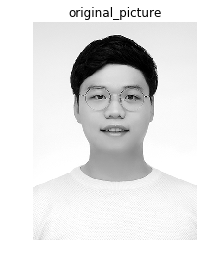

In [8]:
# 원본 이미지 불러오기
img =Image.open("C:/Users/LEE/Desktop/소프트웨어 연계전공/자료구조/greyscale.png")
plt.figure()
plt.title('original_picture')
plt.imshow(img)
plt.axis('off')
plt.show()

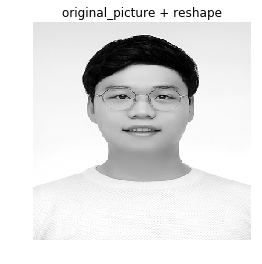

In [9]:
img = img.resize((512,512))
plt.figure()
plt.title('original_picture + reshape')
plt.imshow(img)
plt.axis('off')
plt.show()
img = np.array(img)

(-0.5, 511.5, 511.5, -0.5)

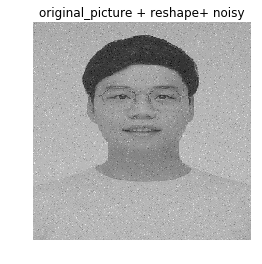

In [11]:
# 이미지 영역 30%에 랜덤 노이즈를 만든다. z = 0, 1이고, 1인 부분이 노이즈가 추가되는 부분임
z = np.random.binomial(1, 0.3, img.shape) # 1이 30%인 z
noise = img.std() * 0.5 * np.random.standard_normal(img.shape) 
 #노이즈가 너무 크면 original image가 완전히 훼손되므로 
z = z * noise # # 0이 70 %이고 1이 30%이므로 30%만 훼손

# 노이즈가 추가된 이미지를 만든다.
noisy_face = np.copy(img).astype(np.float) + z
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.title('original_picture + reshape+ noisy')
plt.axis('off')

24.74282217025757


(-0.5, 511.5, 511.5, -0.5)

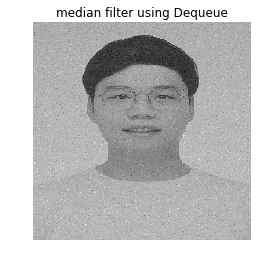

In [12]:
# Dequeue를 사용해 중첩 부분은 놔두고 바뀌는 부분만 빼고, 넣고 하여 구현한 결과
import time
start = time.time()
filtered = np.zeros(noisy_face.shape)
filtered
windowSize = 3
gap = windowSize // 2 # 제외되는 픽셀수 : 1 
        
for i in range(gap, noisy_face.shape[0]-gap):
    # 좌에서 우로 이동하고, 끝이 되면 한칸 내려서 큐를 리셋하고 진행한다.
    dq = Dequeue()
    # 초기 큐를 생성(추가순서는 빼기 쉽게 세로우선으로 추가한다.)
    for c in range(-gap,gap+1):
        #print()
        for r in range(-gap,gap+1):
           # print(i+r, 1+c)
            dq.insertLast(noisy_face[i+r,1+c]) # dq에는 세로로 먼저 추가한다
            filtered[i,1] = np.median(dq.dq) 
    # 생성된 큐에서 윈도우 개수 만큼 빼고. 다시 윈도우 개수 만큼 추가한다.
    for j in range(2,noisy_face.shape[0]-1): 
        #print()
        for k in range(gap,-gap-1,-1):
            dq.popFirst() # 하나빼고 하나 넣고 ...
            #print(i+k, j+gap)
            dq.insertLast(noisy_face[i+k,j+gap])
        filtered[i,j] = np.median(dq.dq)
print(time.time()-start) # 계산 시간 프린트
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.title('median filter using Dequeue')
plt.axis('off')

# <font color='orange'> <H.W # 8> 아래 트리를 구현하고 단말 노드 질병 간의 거리를 계산하는 메소드를 구현하시오.<br>
대장염과 대장암의 거리는 1/3 이고, 대장염과 위궤양의 거리는 3/2, 대장염과 독감의 거리는 3/3 이다.</font>

                
 ![](https://drive.google.com/uc?id=14Y5yfehCM5U7zj4OM2F8N55IK0xoGC9S) </center>


In [14]:
class BinaryTree:
    def __init__(self):
        self.t = [None]
        
    def append(self, item):
        self.t.append(item)
    
    def size(self):
        return len(self.t) - 1 # 하나가 비어있으므로
    
    def getChild(self, item):
        if item in self.t: # self.t에 item이 있으면
            k = self.t.index(item) # item이 있는 index의 위치
            lidx = 2 * k
            ridx = 2 * k + 1
            if lidx <= self.size(): # child가 있는경우
                lnode = self.t[lidx]
            else: # child가 없는경우
                lnode = None
            if ridx <= self.size():
                rnode = self.t[ridx]
            else:
                rnode = None    
            return lnode, rnode 
        else:# child가 없는 경
            print('item not found~')
    
    def getParent(self, item):
        if item in self.t:
            k = self.t.index(item)
            pidx = k // 2
            if pidx > 0:
                return self.t[pidx]
            else:
                return None
        else:
            print('item not found~')

t = BinaryTree()
for i in range(10):
    t.append(chr(65+i)) # char 65 - A

In [15]:
Disease_list = [['호흡기','소화기병'], '호흡기병', '소화기병','호흡기감염', '폐질환', '위질환', '결장질환','독감', '기관지염', '폐부종', '폐색전증', '위궤양', '위암', '대장염', '대장암']

Disease_Tree = BinaryTree()

for disease in Disease_list:
    Disease_Tree.append(disease)
    
def find_distance(D1, D2): # D1, D2 병명을 주면 거리를 계산 해주는 함수
    if Disease_Tree.getParent(D1) == Disease_Tree.getParent(D2):
        print('{}과 {}의 거리는 1/3 이다'.format(D1,D2))
        
    else:
        parent_D1 = Disease_Tree.getParent(D1)
        parent_D2 = Disease_Tree.getParent(D2)
        if Disease_Tree.getParent(parent_D1) == Disease_Tree.getParent(parent_D2):
            print('{}과 {}의 거리는 2/3 이다'.format(parent_D1,parent_D2))
        else:
            print('{}과 {}의 거리는 3/3 이다'.format(D1,D2))

find_distance('대장염','대장암')
find_distance('대장염','위궤양')
find_distance('대장염','독감')

대장염과 대장암의 거리는 1/3 이다
결장질환과 위질환의 거리는 2/3 이다
대장염과 독감의 거리는 3/3 이다


# <font color = orange> H.W # 9: 싸다싸 쇼핑몰 마우스 최저가 문제</font>

쇼핑몰은 마우스는 항상 10개 재고를 가지고 있다.(최저가 마우스가 팔리면 즉시 새로 마우스를 보충)<br>
마우스 판매 가격은 평균 만원, 표준편차 천원인 정규분포를 따른다. 도입가를 7,000원이라고 가정할 때, 대당 평균이익은 얼마인가?<br>
예를 들어, 최저가 마우스가 7,500원이라면 이익은 500원 이다.<br>



In [16]:
# Min_heap 클래스 만들기
class Min_Heap:
     # 힙은 0번째를 비워 놓는다
    def __init__(self): # 초기화
        self.x = [None]

     # 리스트의 i, j번째 위치를 바꾼다. 
    def exchange(self, i, j):
         self.x[i], self.x[j] = self.x[j], self.x[i]

     # 힙에 item을 push한다.
    def Heap_Push(self, item):
     # item을 마지막 위치에 삽입하고 삽입된 위치를 자식노드로 보고 
     # 부모노드와 자리 바꿈 로직을 실시한다.
        self.x.append(item)
        child_Index = len(self.x) - 1 # 맨끝에는 length - 1 이므로 ex)10개의 아이템 - 0~9까지
        parents_Index = child_Index //2
        print(self.x)
        while parents_Index >0: # parents가 0보다 클때까지
            if self.x[child_Index] < self.x[parents_Index]:
                self.exchange(child_Index, parents_Index)
            child_Index = parents_Index
            parents_Index = child_Index //2

     # 힙에서 최소값을 pop한다.
    def Heap_Pop(self):
        last_Index = len(self.x) -1
         # pop할 값을 item에 저장하고 최소값이 더이상 힙에 필요없으므로 
         # 마지막 노드와 위치를 바꾼다음 마지막 노드를 지워 힙 크기를 줄인다
        item = self.x[1] # 최소값
        self.exchange(1, last_Index)
        del self.x[-1]
         # 힙 구조가 맞는지 힙구조를 체크보정한다
        self.heapify()
        return item 

 # 부모노드의 위치를 주면 자식 노드의 위치를 반환한다, 단, 자식노드가 없을경우 [None]반환
    def children(self, parents_Index):
        left_Index = parents_Index *2
        right_Index = left_Index +1
        if left_Index > len(self.x) - 1: left_Index = None
        if right_Index > len(self.x) - 1: right_Index = None
        return left_Index, right_Index # 튜플 형식으로 반환

     # 부모노드를 루트부터 끝까지 탐색하면서 힙구조에 맞지 않을 경우 자리 바꿈을 실시

    def heapify(self):
        parents_Index = 1
        while parents_Index < len(self.x):
            left_Index, right_Index = self.children(parents_Index)
         # 자식노드가 왼쪽, 오른쪽 다있는 경우
            if left_Index != None and right_Index != None:
                if self.x[left_Index] > self.x[right_Index]:
                    min_Index = right_Index
                else:
                    min_Index = left_Index
                if self.x[min_Index] < self.x[parents_Index]:
                    self.exchange(parents_Index, min_Index)
            # 왼쪽만 있으면
            elif left_Index != None:
                if self.x[left_Index] < self.x[parents_Index]:
                    self.exchange(parents_Index, left_Index)
            parents_Index += 1
            
    def print(self):
        return self.x

#  평균이 만원 표준편차가 1000원인 정규분포를 따르는 난수 10개를 이용해 최소힙을 구성한다.
price = 1000 * np.random.randn(10) + 10000 # 1000 * 표준정규분포를따르는 난수 + 10000 
h = Min_Heap()

# heap tree에 PUSH
for item in price:
    h.Heap_Push(item)
    
# 최솟값을 Pop하고 난 후 Sold_List에 추가하고 다시 price를 생성한 후 Push해줌
Sold_List = []

for i in range(10000):
    Sold_List.append(h.Heap_Pop() - 7000)
    h.Heap_Push(float(1000 * np.random.randn(1) + 10000))
    
print('10000번 돌린 후',sum(Sold_List)/len(Sold_List))

[None, 9540.304648522359]
[None, 9540.304648522359, 10168.453800338444]
[None, 9540.304648522359, 10168.453800338444, 10972.90063117172]
[None, 9540.304648522359, 10168.453800338444, 10972.90063117172, 11239.747647641594]
[None, 9540.304648522359, 10168.453800338444, 10972.90063117172, 11239.747647641594, 9993.347859345096]
[None, 9540.304648522359, 9993.347859345096, 10972.90063117172, 11239.747647641594, 10168.453800338444, 9551.646925254134]
[None, 9540.304648522359, 9993.347859345096, 9551.646925254134, 11239.747647641594, 10168.453800338444, 10972.90063117172, 10400.970627325465]
[None, 9540.304648522359, 9993.347859345096, 9551.646925254134, 11239.747647641594, 10168.453800338444, 10972.90063117172, 10400.970627325465, 10731.401173225746]
[None, 9540.304648522359, 9993.347859345096, 9551.646925254134, 10731.401173225746, 10168.453800338444, 10972.90063117172, 10400.970627325465, 11239.747647641594, 8689.700641770196]
[None, 8689.700641770196, 9540.304648522359, 9551.646925254134,

[None, 12521.40591086465, 12547.318562253493, 12581.965283325462, 12758.478016497835, 12762.672008046506, 12928.303137891184, 13347.88150149438, 13266.761777034515, 13384.44407553716, 10213.29850246609]
[None, 12521.40591086465, 12547.318562253493, 12581.965283325462, 12758.478016497835, 12762.672008046506, 12928.303137891184, 13347.88150149438, 13266.761777034515, 13384.44407553716, 11168.175402786068]
[None, 12521.40591086465, 12547.318562253493, 12581.965283325462, 12758.478016497835, 12762.672008046506, 12928.303137891184, 13347.88150149438, 13266.761777034515, 13384.44407553716, 9360.732690041328]
[None, 12521.40591086465, 12547.318562253493, 12581.965283325462, 12758.478016497835, 12762.672008046506, 12928.303137891184, 13347.88150149438, 13266.761777034515, 13384.44407553716, 9237.459716630441]
[None, 12521.40591086465, 12547.318562253493, 12581.965283325462, 12758.478016497835, 12762.672008046506, 12928.303137891184, 13347.88150149438, 13266.761777034515, 13384.44407553716, 101

[None, 12758.478016497835, 12856.20396650186, 12762.672008046506, 13266.761777034515, 13138.579544636812, 12928.303137891184, 13347.88150149438, 13284.617054830325, 13384.44407553716, 11006.566147677746]
[None, 12758.478016497835, 12856.20396650186, 12762.672008046506, 13266.761777034515, 13138.579544636812, 12928.303137891184, 13347.88150149438, 13284.617054830325, 13384.44407553716, 10283.568731298556]
[None, 12758.478016497835, 12856.20396650186, 12762.672008046506, 13266.761777034515, 13138.579544636812, 12928.303137891184, 13347.88150149438, 13284.617054830325, 13384.44407553716, 10259.517606193682]
[None, 12758.478016497835, 12856.20396650186, 12762.672008046506, 13266.761777034515, 13138.579544636812, 12928.303137891184, 13347.88150149438, 13284.617054830325, 13384.44407553716, 7147.972269657394]
[None, 12758.478016497835, 12856.20396650186, 12762.672008046506, 13266.761777034515, 13138.579544636812, 12928.303137891184, 13347.88150149438, 13284.617054830325, 13384.44407553716, 8

[None, 12928.303137891184, 12955.780219745837, 13138.579544636812, 13266.761777034515, 13004.36925204265, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9824.180013821262]
[None, 12928.303137891184, 12955.780219745837, 13138.579544636812, 13266.761777034515, 13004.36925204265, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9434.082920036544]
[None, 12928.303137891184, 12955.780219745837, 13138.579544636812, 13266.761777034515, 13004.36925204265, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9112.826831678565]
[None, 12928.303137891184, 12955.780219745837, 13138.579544636812, 13266.761777034515, 13004.36925204265, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 10017.783212004671]
[None, 12928.303137891184, 12955.780219745837, 13138.579544636812, 13266.761777034515, 13004.36925204265, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 118

[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9984.25510204921]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9034.586277313698]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 11089.589315214043]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9639.345687096004]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 1142

[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9325.96340202253]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 8766.72993283083]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9323.830249052196]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 8023.775960210774]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 8512.9

[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 10428.839131951816]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 10629.375693931655]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 10866.435125213371]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9713.276580941065]
[None, 12955.780219745837, 13004.36925204265, 13138.579544636812, 13266.761777034515, 13616.599897366408, 13943.640990654365, 13347.88150149438, 13284.617054830325, 13384.44407553716, 9

[None, 13079.180338451813, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 10666.902921256082]
[None, 13079.180338451813, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 10259.767124369495]
[None, 13079.180338451813, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 10580.880343654597]
[None, 13079.180338451813, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 9341.009521274365]
[None, 13079.180338451813, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.444075537

[None, 13118.83114722041, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 8388.759738155113]
[None, 13118.83114722041, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 9803.53464184301]
[None, 13118.83114722041, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 9254.91641223536]
[None, 13118.83114722041, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 9261.23552873407]
[None, 13118.83114722041, 13266.761777034515, 13138.579544636812, 13284.617054830325, 13584.403525999416, 13943.640990654365, 13347.88150149438, 13616.599897366408, 13384.44407553716, 7712.81

[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 8886.287679871679]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 11075.607812457985]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 10078.088757518151]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 10143.15284827636]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.4440755371

[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 9949.640828231612]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 10994.350024812775]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 10410.191902950877]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.44407553716, 8656.163844557135]
[None, 13138.579544636812, 13266.761777034515, 13347.88150149438, 13284.617054830325, 13328.674037893592, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13384.4440755371

[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 10699.828244989607]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 8776.26309287257]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9991.718005438637]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9761.59918834647]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 11236.4216

[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9009.406417700602]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9251.78718492513]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 10152.400375886955]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 10765.982679177092]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 10766.75

[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9368.734756837479]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9987.011469844361]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 9056.77610612122]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 10935.022120904549]
[None, 13284.617054830325, 13328.674037893592, 13347.88150149438, 13384.44407553716, 13871.8920631413, 13943.640990654365, 13584.403525999416, 13616.599897366408, 13736.462785325413, 10173.744

# <font color = 'orange'> H.W # 10: BSTree와 일반 리스트의 탐색속도를 시뮬레이션해보자.</font>

리스트에 10만개의 정수를 중복없는 수로 만들고, 그 중 랜덤하게 한개를 지정한 다음<br>
1. 리스트 순차검색으로 찾는데 걸리는 시간을 기록한다.<br>
2. BSTree에 넣고 찾는데 걸리는 시간을 기록한다.<br>
단, 리스트에 넣고, BSTree에 넣는 시간은 제외하고 순수하게 찾는 시간만 비교한다. <br>

**BST에 넣고나왔을때 0초일때가있음.. 여러번 돌려야하는데 귀찮아서 0이 아닌값이 나올때 사용**

In [17]:
# 100,000개의 random_number_list만들기
random_number_list = []

while len(random_number_list) < 100000:
    random_number_list.append(np.random.randint(1,1000000000))

find_num = random_number_list[np.random.randint(0,100000)]

start = time.time()
for item in random_number_list:
    if item == find_num:
        end = time.time()
print('리스트에서 데이터값을 찾는 데 걸리는 시간은 ', end - start)

리스트에서 데이터값을 찾는 데 걸리는 시간은  0.002989530563354492


In [18]:
class BNode:
    def __init__(self, item, left=None, right=None):
        self.item = item
        self.left = left
        self.right = right

class BSTree:
    def __init__(self):
        self.root = None

    def insert(self, item):  # item을 삽입한다.
        self.root = self._insert(self.root, item)

    def _insert(self, curNode, item):
        # curNode 부터 밑으로 item 삽입위치를 찾아 삽입한다.
        # 현재 노드가 None이면 현재노드에 새노드를 삽입한다.
        if curNode == None:
            curNode = BNode(item)
        elif item < curNode.item:
        # 삽입할 값이 현재 노드값 보다 작으면 좌측을 현재노드로 보고 삽입을 실행한다.
            curNode.left = self._insert(curNode.left, item)
        else:
        # 삽입할 값이 현재 노드값 보다 크면 우측을 현재노드로 보고 삽입을 실행한다.
            curNode.right = self._insert(curNode.right, item)
        # 재귀가 끝나서 새노드를 삽입했다면 자신을 호출한 프로세스에 새노드를 리턴한다.
        return curNode
    
    def inOrder(self):
        return self._inOrder(self.root)

    def _inOrder(self, node, sorted=[]):
        # 현재 노드가 비어있지 않으면 일단, 계속 좌측으로 간다. 좌측의 끝에 도달하면 노드를 출력하고 오른쪽으로 이동한다.
        if node is not None:
            self._inOrder(node.left, sorted)  # 계속해서 left로~~
            sorted.append(node.item)
            self._inOrder(node.right, sorted)
        return sorted

    def levelOrder(self, node=None):
        if node == None:
            node = self.root
        h = self.height(node)
        for i in range(1, h + 1):
            self._levelOrder(node, i)

    def _levelOrder(self, node, level):
        if node is None:
            return
        if level == 1:
            print(node.item, end=" ")
        elif level > 1:
            self._levelOrder(node.left, level - 1)
            self._levelOrder(node.right, level - 1)

    def height(self, node):
        if node is None:
            return 0
        else:
            # Compute the height of each subtree
            lheight = self.height(node.left)
            rheight = self.height(node.right)

            # Use the larger one
            if lheight > rheight:
                return lheight + 1
            else:
                return rheight + 1
            
    def search(self, item):
        # 루트부터 item을 찾는다.
        return self._search(self.root, item)

    def _search(self, curNode, item):
        # curNode 밑에서 item을 찾는다.
        if curNode == None:
            print("item not found")
        elif curNode.item == item:
            # 찾은 item을 리턴한다.
            return item
        elif curNode.item > item:
            # 최종적으로 찾은 item을 리턴해야 한다. 리턴이 없으면 찾아도 리턴되지 않으므로 재귀를 끝낼때 리턴에 의해 item을 연쇄적으로 반환해야 한다.
            return self._search(curNode.left, item)
        elif curNode.item < item:
            # 최종적으로 찾은 item을 리턴해야 한다.
            return self._search(curNode.right, item)

In [21]:
random_number_list = []
while len(random_number_list) < 100000:
    random_number_list.append(np.random.randint(1,1000000000))
find_num = random_number_list[np.random.randint(0,100000)]

Binary_Search_Tree = BSTree()
for val in random_number_list:
    Binary_Search_Tree.insert(val)
start = time.time()
Binary_Search_Tree.search(find_num)
end = time.time()
print(end-start)

0.0
